In [3]:
import cv2
import matplotlib.pyplot as plt

def extract_orb_features(image):
    

    # Initialize the ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    #descriptor store
    descriptors = orb.compute(image, keypoints)
    

    plt.imshow(image_with_keypoints)

    return keypoints, descriptors




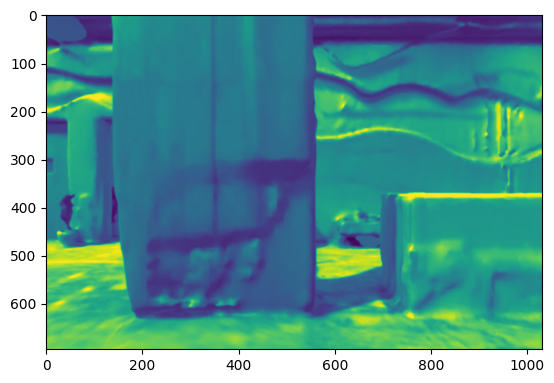

In [20]:
image_path = "./(-1.55, 0.00, -1.36)_1.2_270.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_smooth = cv2.medianBlur(image, 5)
# keypoints, descriptors = extract_orb_features(image_smooth)
image_smooth = cv2.GaussianBlur(image_smooth,(5,5),0)
plt.imshow(image_smooth)

((< cv2.KeyPoint 0x13b58b7e0>,
  < cv2.KeyPoint 0x12f059d70>,
  < cv2.KeyPoint 0x12e8f8b70>,
  < cv2.KeyPoint 0x12e8f8120>,
  < cv2.KeyPoint 0x12f0b02a0>,
  < cv2.KeyPoint 0x12f0b14d0>,
  < cv2.KeyPoint 0x12f0b01e0>,
  < cv2.KeyPoint 0x12f0b1470>,
  < cv2.KeyPoint 0x12f0b1e90>,
  < cv2.KeyPoint 0x12f0b1a40>,
  < cv2.KeyPoint 0x12f0b0090>,
  < cv2.KeyPoint 0x12f06a250>,
  < cv2.KeyPoint 0x12f01c0c0>,
  < cv2.KeyPoint 0x13b5cc2a0>,
  < cv2.KeyPoint 0x13b5cc360>,
  < cv2.KeyPoint 0x13b5cc330>,
  < cv2.KeyPoint 0x13b5cc300>,
  < cv2.KeyPoint 0x13b5cc060>,
  < cv2.KeyPoint 0x13b5cc0f0>,
  < cv2.KeyPoint 0x13b5cc210>,
  < cv2.KeyPoint 0x13b5cc390>,
  < cv2.KeyPoint 0x13b5cc1b0>,
  < cv2.KeyPoint 0x13b5cc270>,
  < cv2.KeyPoint 0x13b5cc1e0>,
  < cv2.KeyPoint 0x13b5cc150>,
  < cv2.KeyPoint 0x13b5cc120>,
  < cv2.KeyPoint 0x13b5cc4b0>,
  < cv2.KeyPoint 0x13b5cc480>,
  < cv2.KeyPoint 0x13b5cc4e0>,
  < cv2.KeyPoint 0x13b5cc510>,
  < cv2.KeyPoint 0x13b5cc540>,
  < cv2.KeyPoint 0x13b5cc570>,
  < cv2.

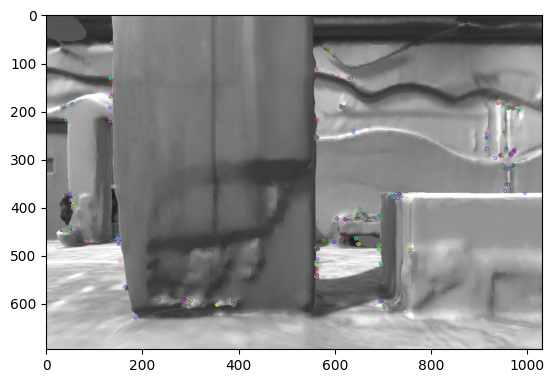

In [22]:
plt.imshow(image)
extract_orb_features(image)

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import os
import cv2
import numpy as np

# The size of encoded representations
encoding_dim = 32 

# Input placeholder
input_img = Input(shape=(256, 256, 3)) 

# Architecture of the autoencoder
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

# Combine encoder and decoder into one model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#train and test images
X_train = []
X_test = []

images_train = [i for i in os.listdir("./capture/train/") if i.endswith('.png')]
images_test = [i for i in os.listdir("./capture/test/") if i.endswith('.png')]

for image in images_train:
    img = cv2.imread("./capture/train/" + image)
    if img is None:
        print(f"Image {image} could not be read.")
        continue
    img = cv2.resize(img, (256, 256)) / 255.  # Resizing to 256X256 and normalizing the pixel values
    X_train.append(img)

for image in images_test:
    img = cv2.imread("./capture/test/" + image)
    if img is None:
        print(f"Image {image} could not be read.")
        continue
    img = cv2.resize(img, (256, 256)) / 255.  # Resizing to 256X256 and normalizing the pixel values
    X_test.append(img)

X_train = np.array(X_train)
X_test = np.array(X_test)

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test)) 

# The "encoder" part of the autoencoder
encoder = Model(input_img, encoded)


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/model_4/conv2d_28/BiasAdd/BiasAddGrad' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cm/908kzsfd6ldbkqk3f43jb_2w0000gn/T/ipykernel_10835/2979477211.py", line 63, in <module>
      autoencoder.fit(X_train, X_train,
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 598, in minimize
      grads_and_vars = self._compute_gradients(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 656, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 532, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_4/conv2d_28/BiasAdd/BiasAddGrad'
BiasGrad requires tensor size <= int32 max
	 [[{{node gradient_tape/model_4/conv2d_28/BiasAdd/BiasAddGrad}}]] [Op:__inference_train_function_2157]